<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP2_Harkovsky_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. MVP Machine Learning

## ROBERTO HARKOVSKY DA CUNHA

### Base Movie Dataset: Budgets, Genres, Insights

## A1. Definição do Problema

O negócio de entretenimento cinematográfico busca não somente gerar conteúdos que entretenham seu público, mas também, como qualquer outra empresa, visa obteção de lucros. Muitos fatores, como boas histórias, bons diretores e atores experientes contribuem para criação de bons filmes. além disto, temos as avaliações dos críticos e a aceitação popular dos conteúdos que podem influenciar num bom desempenho de bilheteria.

Sobre o dataset:
O dataset utilizado neste projeto será o IMDB 5000 Movie Dataset, proveniente originalmente do Kaggle. Ele contém 5.043 filmes, abrangendo 100 anos (1916 a 2016)  em 66 países, classificados segundo 28 variáveis, e informações massivas de diretores (2399 nomes únicos) e milhares de atores/atrizes.
Ele possui uma coleção abrangente de informações sobre 5.043 filmes. Ele fornece uma ampla gama de detalhes sobre cada filme, incluindo orçamento, gêneros, produtoras, data de lançamento, receita, tempo de execução, idioma, popularidade e muito mais.

Informações sobre os atributos:
1. movie_title - Título do filme
2. duration - Duração em minutos
3. director_name - Nome do Diretor do Filme
4. director_facebook_likes - Número de curtidas do Diretor em sua página no Facebook
5. actor_1_name - Ator principal estrelando o filme
6. actor_1_facebook_likes - Número de curtidas do Ator 1 em sua página no Facebook
7. actor_2_name - Outro ator estrelando o filme
8. actor_2_facebook_likes - Número de curtidas do Ator 2 em sua página no Facebook
9. actor_3_name - Outro ator estrelando o filme
10. actor_3_facebook_likes - Número de curtidas do Ator 3 em sua página no Facebook
11. num_user_for_reviews - Número de usuários que deram uma avaliação
12. num_critic_for_reviews - Número de resenhas críticas no imdb
13. num_voted_users - Número de pessoas que votaram no filme
14. cast_total_facebook_likes - Número total de curtidas no Facebook de todo o elenco do filme
15. movie_facebook_likes - Número de curtidas no Facebook na página do filme
16. plot_keywords - Palavras - chave que descrevem o enredo do filme
17. facenumber_in_poster - Número do ator que apareceu no pôster do filme
18. color - Colorização de filmes (P&B ou 'Cores')
19. genres - Gênero do filme ('Animação', 'Comédia', 'Romance', 'Terror', 'Sci - Fi', 'Ação', 'Família')
20. title_year - O ano em que o filme foi lançado (entre 1916 e 2016)
21. language - linguagem do filme
22. country - País onde o filme foi produzido
23. content_rating - Classificação do conteúdo do filme
24. aspect_ratio - Proporção de tela em que o filme foi feito
25. movie_imdb_link - Link para IMDB do filme
26. gross - Receita bruta do filme em dólares
27. budget - Orçamento do filme em dólares
28. imdb_score - Pontuação IMDB do filme no IMDB


Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

Com base nas informações massivas do filme, seria interessante entender quais são os fatores importantes que tornam um filme mais bem-sucedido do que outros.
Então, gostaria de analisar que tipo de filme faz mais sucesso, ou seja, consegue maior pontuação no IMDB.
Considere as pontuações do imdb como variável de resposta e concentre-se nas previsões operacionais, analisando o restante das variáveis nos dados do filme.

A hipótese a ser avaliada nesta análise é se algumas das variáveis (atributos) influenciam na bilheteria(faturamento) do produto, que é medida pela variável "revenue".

Este é um problema de aprendizado supervisionado por regressão.


## A2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise, definição de funções úteis na análise e a carga do dataset.




### Importando Biliotecas

In [ ]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Particionamento e validação cruzada
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada

# modelagem
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

#from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import chi2, f_regression
# from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
#from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

### Funções Personalizadas
Trata-se de um conjunto de funções úteis para impressão de gráficos e informações sobre os datasets utilizados ao longo desta análise exploratória, que aparecem em diversas etapas da análise.

O objetivo é tornar o código mais limpo e de fácil de entendimento.


In [ ]:
# Função para impressão de 2 gráficos barplot:
# parametros:
# var1 - Atributo a ser agrupado por IMDB e titulos,
# linhas - quantidade de linhas da tabela a apresentar
def imprime_por_titulo_imdb (var1, linhas):

# Mostra top generos avaliados definido por parametro "linhas"
  plt.figure(figsize=(15,20))
  sns.set(style="darkgrid")

  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_titulos_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_titulos_df = top_titulos_df[0:linhas]
  avg_rating_top_df = avg_rating_df[(avg_rating_df[var1].isin(top_titulos_df[var1]) == True)] # maiores IMDBs relativos top linhas
  avg_rating_abs_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')
 # fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# 1o gráfico
  plt.subplot(2, 1, 1)
  ax1.set_title('Maiores Lançamentos de filmes (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.barplot(x = 'Titulo', y = var1, data = top_titulos_df, ax = ax1)

# 2o gráfico
  plt.subplot(2, 1, 2)
  ax2.set_title('Média de Pontuações dos Maiores Lançamentos (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax2.set_xlabel('IMDB', fontsize = 10)
  #ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_top_df, ax=ax2)

  plt.subplots_adjust(hspace=0.8);
  plt.yticks(size= 10)
  plt.xticks(size= 10)
  plt.show()

# Função para impressão de um gráfico barplot por IMDB
# parametros:
# var1 - Atributo a ser comparado,
# linhas - quantidade de linhas da tabela a apresentar
def imprime_groupby (var1, var2, linhas):
  avg_rating_df = ds.groupby([var1], as_index = False)[var2].mean().sort_values(var2, ascending=False)
  avg_rating_df = avg_rating_df[0:linhas] # maiores  absolutos

  fig, (ax1) = plt.subplots(1,1, figsize= (10,3), layout='constrained')

  ax1.set_title('Média de ' + var2 + ' Pontuações Absolutas  (top '+ str(linhas) +') por ' + var1 , fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  sns.barplot(x = var2, y = var1, data = avg_rating_df, ax=ax1)

  return(avg_rating_df)

# Função para impressão das tabelas que alimentam os graficos
# parametros:
# atr1 - atributo agrupado
# atr2 - Atributo a ser contado/somado/media
# linhas - quantidade de linhas da tabela a apresentar
# tab_num - imprime a tabela tab_num (1,2,3 ou 4)
def tabela_por_titulo(atr1, atr2, linhas, tab_num):

  if  tab_num==1: # Titulos por periodo
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    top_df = top_df[0:linhas]
    display(top_df)
    total_titulos = top_df[atr2].sum()
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} temos {total_titulos} títulos')
    print(f'Esta amostra equivale a {100*total_titulos/584:2.1f}% do total lançado')
  elif tab_num==2: # gross top
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    top_df = top_df[0:linhas]
    avg_rating_df = avg_rating_df[(avg_rating_df[atr1].isin(top_df[atr1]) == True)]
    max_imdb=avg_rating_df[atr2].max()
    min_imdb=avg_rating_df[atr2].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} por média de {atr2} temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')
  elif tab_num==3: # IMDB valores absolutos
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    avg_rating_df = avg_rating_df[0:linhas]
    max_imdb=avg_rating_df[atr2].max()
    min_imdb=avg_rating_df[atr2].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas {linhas} ocorrências de {atr1} por média de {atr2} temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')
  elif tab_num==4: # titulo IMDB asolutos
    top_df = ds.groupby([atr1], as_index = False)[atr2].count().sort_values(atr2, ascending=False)
    avg_rating_df = ds.groupby([atr1], as_index = False)[atr2].mean().sort_values(atr2, ascending=False)
    avg_rating_df = avg_rating_df[0:linhas]
    top_df = top_df[(top_df[atr1].isin(avg_rating_df[atr1]) == True)]
    #max_imdb=avg_rating_df['IMDB'].max()
    #min_imdb=avg_rating_df['IMDB'].min()
    display(top_df)

# Função para impressão de 2 gráficos boxplot
# parametros:
# var1,var2 - Atributos a serem impressos
def imprime2graficosboxplot(var1, var2):

  def outliers(variavel):
 #calculado a faixa dos quartis a serem usados
    imdb_q1 = ds[variavel].quantile(0.25) #1o quartil
    imdb_q3 = ds[variavel].quantile(0.75) #3o quartil
    imdb_iqr = imdb_q3-imdb_q1 # calculando 2o quartil
    imdb_up = imdb_q3 + 1.5 * imdb_iqr #limte superior do 4o quartil
    imdb_low = imdb_q1 - 1.5 * imdb_iqr #limite inferior do 1o quartil
  # descobrindo os outliers
    outlier_imdb = ds[(ds[variavel] < imdb_low) | (ds[variavel] > imdb_up)]
    count_imdb = outlier_imdb.count()[variavel]

    print(f"Outliers de {variavel}: {count_imdb}")
    return(ds[variavel])

# Imprimindo gráficos
  plt.figure(figsize=(10,15))
  #sns.set(style="darkgrid")
  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('outliers de ' + var1 , fontsize = 10)
  #ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.boxplot(x = outliers(var1), ax=ax1)

# 2o gráfico
  ax2.set_title('outliers de ' + var2 , fontsize = 10)
  #ax2.set_xlabel('IMDB', fontsize = 10)
  sns.boxplot(x = outliers(var2), ax=ax2)

  plt.subplots_adjust(hspace=0.6);
  #plt.yticks(size= 10)
  #plt.xticks(size= 10)
  plt.show()

# Função para contagem de variaveis (atributos) por titulo
# parametros:
# var - Atributos a serem contados
def conta_var(var):
  general_df = ds.groupby([var], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  num = general_df[var].count()
  print(f'Existem {num} diferentes {var}')
  return(general_df)

### *Preparando o Dataset*

Carregando o dataset

In [ ]:
# conexão com GDrive
# from google.colab import drive
# drive.mount('/content/gdrive')
# arquivo = "movie_metadata.csv"
# url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# Conexão com GitHub
arquivo = "movie_metadata.csv"
url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

<class 'pandas.core.frame.DataFrame'>


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## A3. Análise Exploratória de Dados
O processo de análise exploratória irá envolver 3 fases:

- Análise descritivas do dataset, onde serão levantadas suas dimensões, tipos de variáveis e estatísticas de frequência daqueles numerais.

- Em seguida começaremos a análise pelas visualizações unimodais, onde avaliaremos o comportamento das variáveis numéricas, sua distribuição estatística

- Após isto partiremos para visualizações multimodais, onde buscaremos as relações entre as possíveis variáveis preditoras e a variável alvo “percepção”.



### 3.1. Estatísticas Descritivas
Nesta primeira etapa será realizada uma análise descritiva do dataset, onde serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

In [ ]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(5043, 28)


O dataset possui 28 colunas com 5043 linhas

In [ ]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

*** Linhas duplicadas ***
45


O Dataset está bastante fragmentado.

As diversas linhas com missing nos atributos serão tratadas na etapa de pre-processamentode dados

In [ ]:
# Mostra as informações sobre as variáveis do dataset
display(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

None

*   16 variáveis quantitativas numéricas

*   12 variáveis qualitativas


In [ ]:
# exibindo um sumário estatístico
display(ds.describe())

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000



---


**Percepções** REVER

**Análise descritiva**

•	Temos um dataset com  28 colunas com 5043  instâncias

•	Do total de 28 variáveis, onde 12 são do tipo object qualitativas e 16 quantitativas numéricas

**Análise estatística**

*   Os valores minimos em 0 (zero) pode indicar missings nas diversas variáveis
*   xxxxxx


---



### 3.2. Visualizações Unimodais

Para avaliar a distribuição de frequências das variáveis numéricas iremos utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.



Gerando gráficos de histograma e densidade

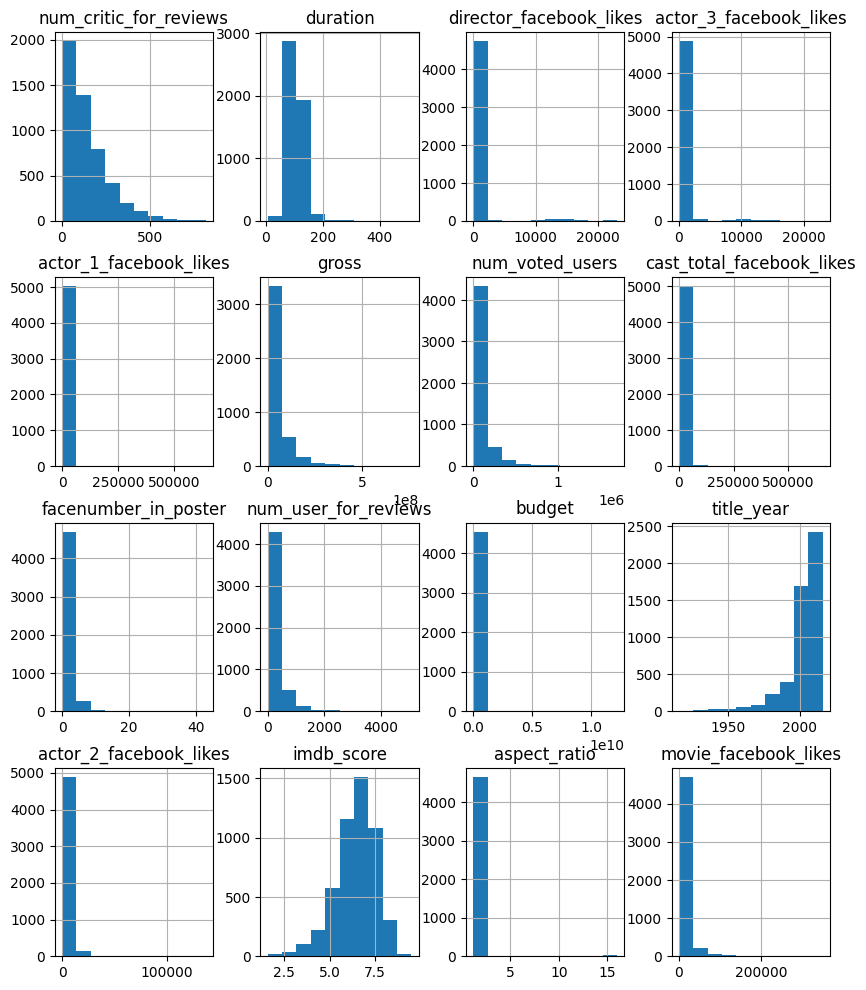

In [ ]:
# Histograma
ds.hist(figsize = (10,12))
plt.show()

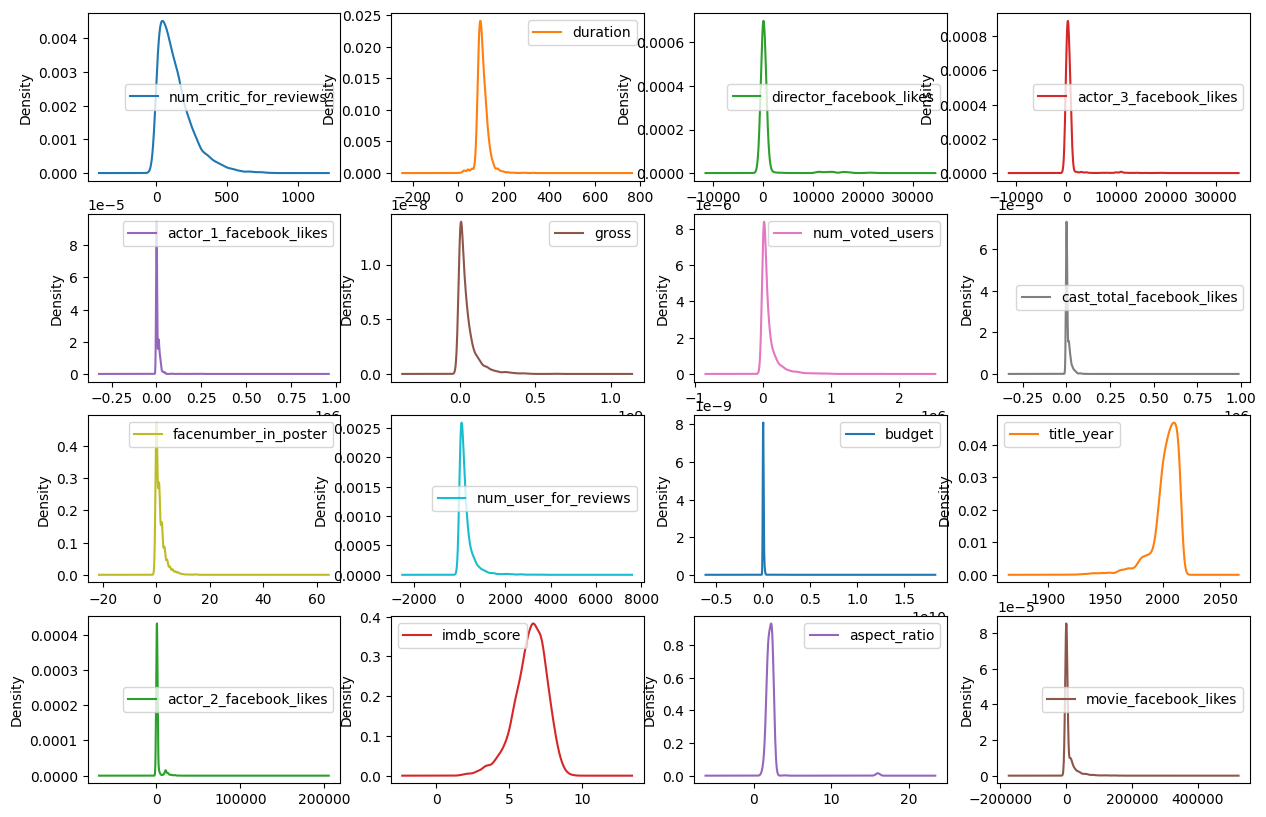

In [ ]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

Os gráficos de Histograma e densidade mostram que as variáveis são unimodais, e que as variáveis "IMDB_score" e "duration" com um comportamento aproximado de uma curva normal. As demais apresentam skew, com um comportamento parecido com logaritmico.

---

**Resumo das percepções da análise da visualização Unimodal:**

- Os gráficos de Histograma e densidade mostram que as variáveis são unimodais, sendo que as variáveis "IMDB_score" e "duration" apresentam com um comportamento aproximado de uma curva normal.
-  As demais apresentam skew, com um comportamento parecido com exponencial, indicando uma distribuição assimétrica dos dados.







---

### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma relação entre as variáveis preditoras com a variável alvo "revenue".

Iniciaremos com o estudo de correlação entre as variáveis, destacando a variável alvo "revenue".

Em seguida interessa-nos avaliar a existência de um possível relacionamento entre as variáveis quantitativas e a variave alvo "revenue"


**Estudo de correlação**

Iniciarei com o estudo da correlação das variáveisl numéricas, com foco na variável alvo "revenue".


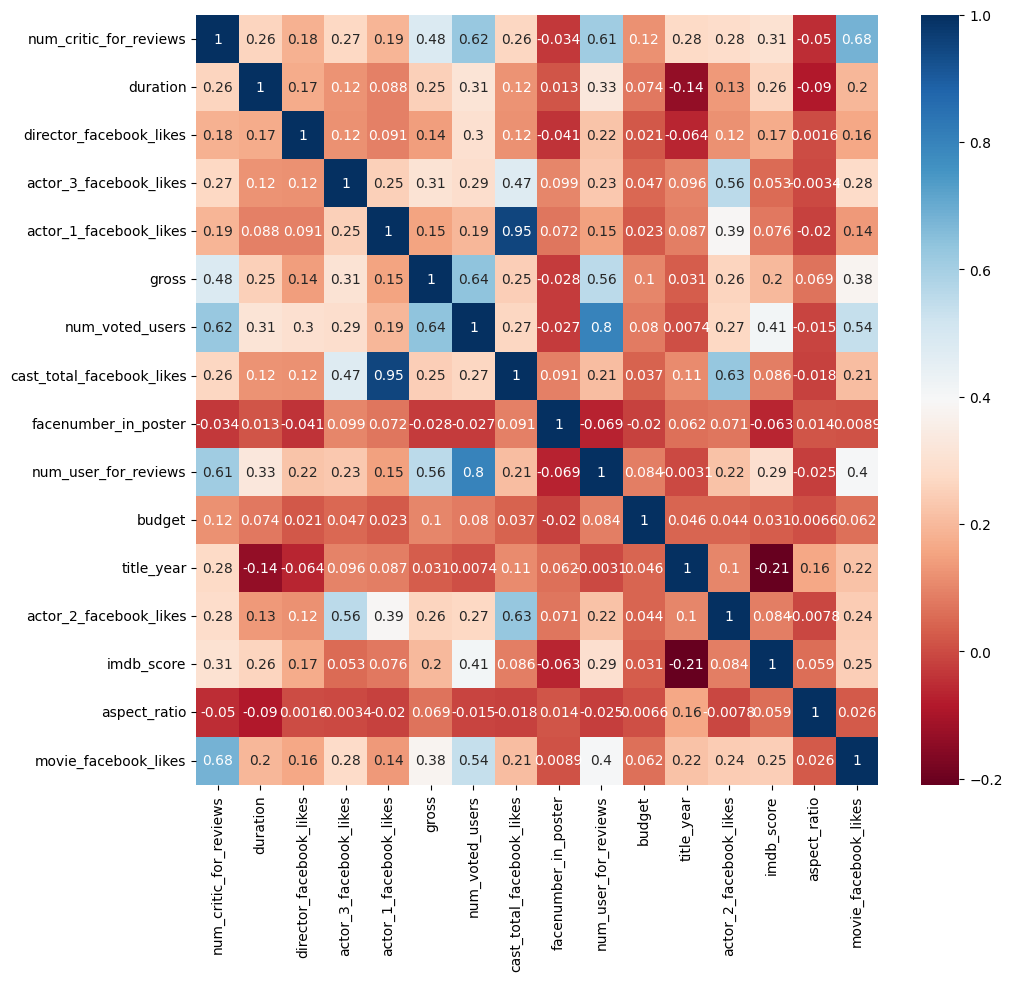

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (11, 10))
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');
plt.show()

Temos correlações consideraveis mas o interesse é na variavel alvo "gross" e as variáveis "num_critics_for_reviews", "num_voted_users" e "num_users_for_reviews", indicando que possivelmente os seguintes pontos:

- Quanto maior as criticas, maior tende a ser a receita
- Quanto maior o número de público votante, maior tende a ser a receita do filme






---


Observando agora a relação da variavel alvo "gross" com demais variáves quantitativas

In [ ]:
# separando colunas categoricas e numericas para uma análise mais clara
cols_num = [column for column in ds.columns if ds[column].dtype != 'object']
cols_categoricas = [column for column in ds.columns if ds[column].dtype == 'object']
print(f'Numericas: {cols_num} \nCategoricas: {cols_categoricas}')

Numericas: ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'] 
Categoricas: ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


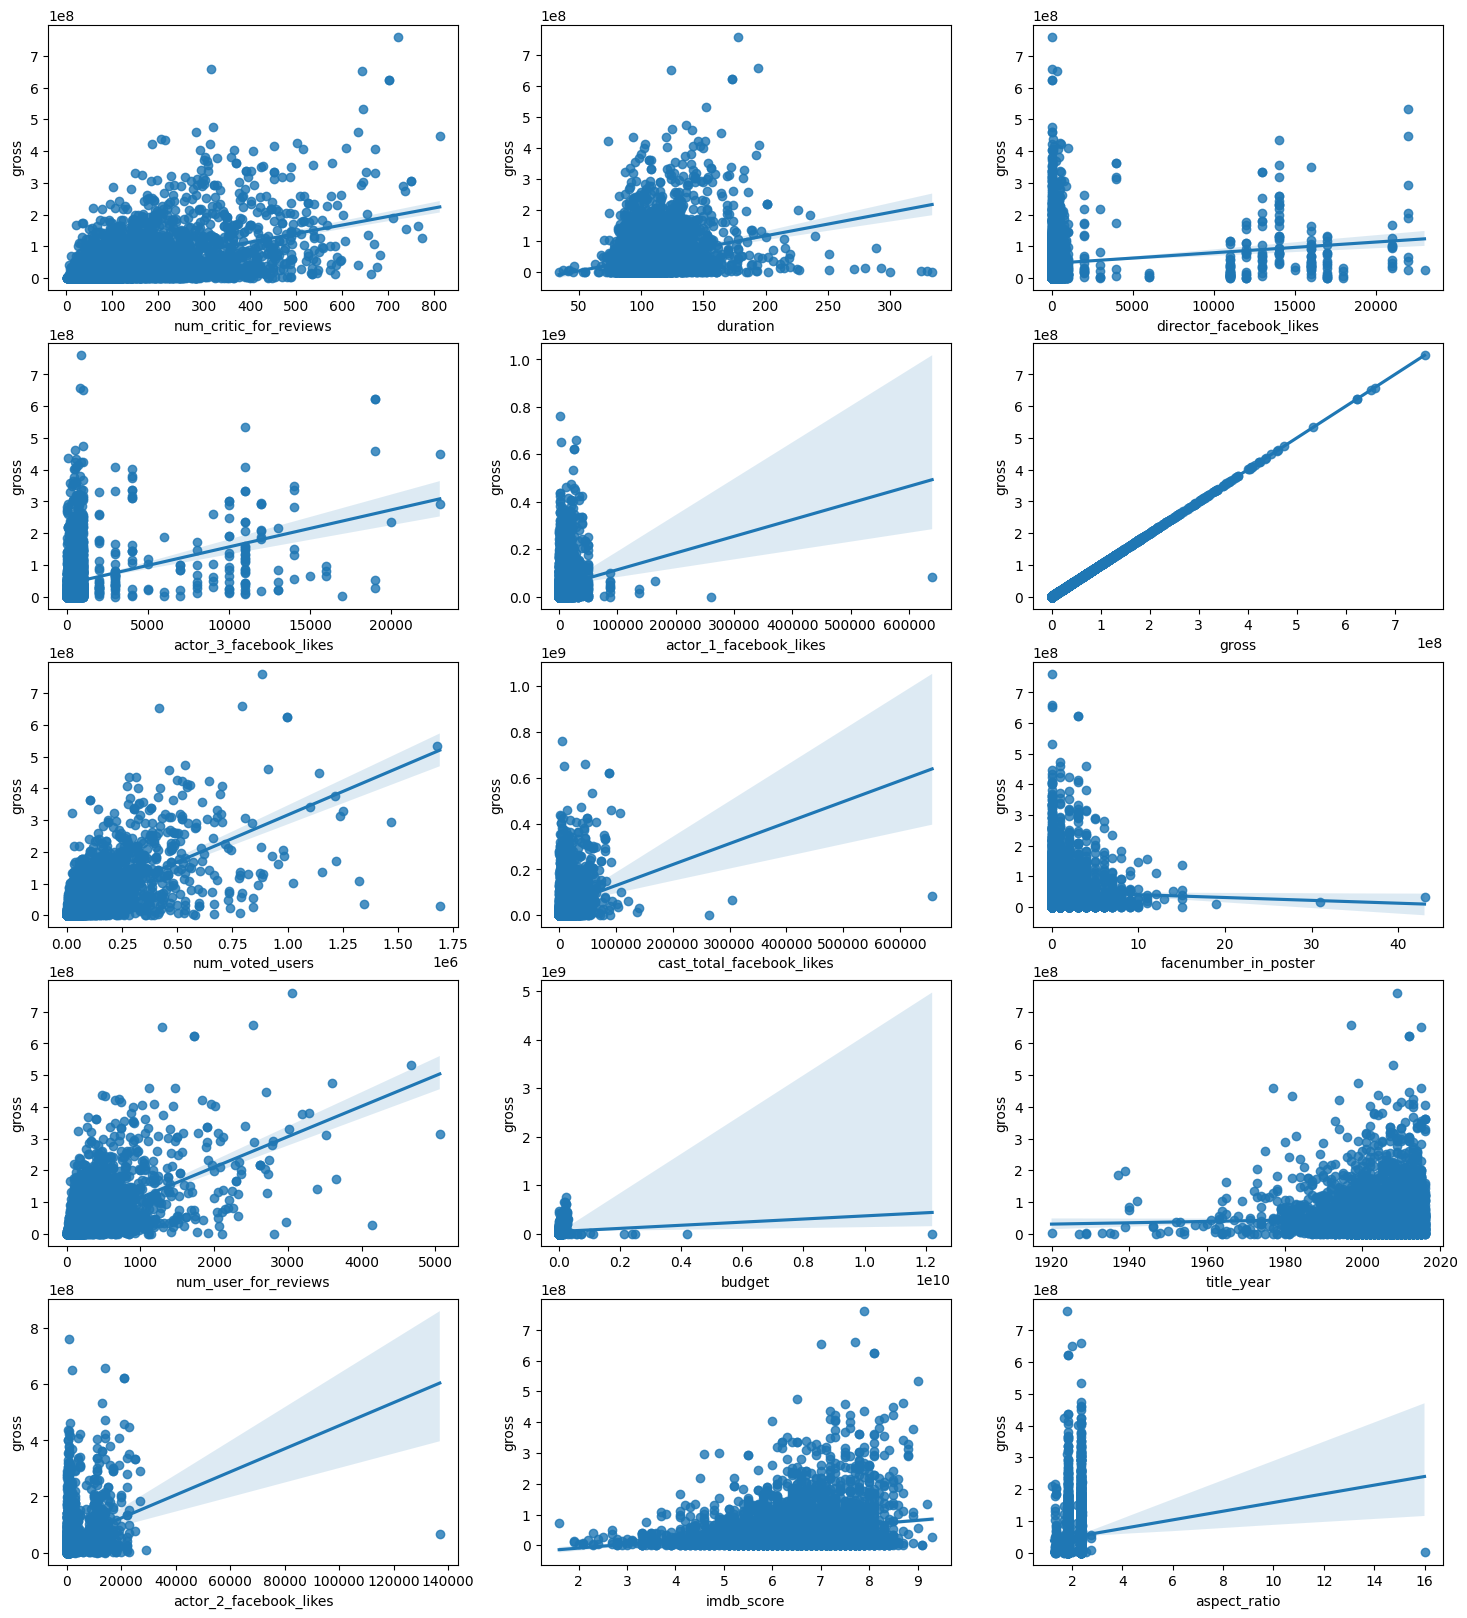

In [ ]:
fig, ax = plt.subplots(round(len(cols_num) / 3), 3, figsize = (18, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cols_num) - 1:
        sns.regplot(x=cols_num[i],y='gross', data=ds[cols_num], ax=ax, label = cols_num)

In [ ]:
# plt.figure(figsize=(25,30))
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,6))

# # 1o gráfico
# plt.subplot(2, 2, 1)
# sns.scatterplot(data= df, x= 'num_voted_users', y= 'gross', hue= 'gross',
#                 size= 'gross', palette= 'RdYlGn', legend= False)

# plt.title('Dispersão num_voted_user x gross', fontsize = 10)
# plt.ylabel('gross', fontsize = 10)
# plt.xlabel('num_voted_user', fontsize = 10)
# #ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)

# # 2o gráfico
# plt.subplot(2, 2, 2)
# sns.scatterplot(data= df, x= 'num_critic_for_reviews',  y= 'gross', hue= 'gross',
#                 size= 'gross', palette= 'RdYlGn', legend= False)

# plt.title('Dispersão num_critics_for_review x gross', size= 10)
# plt.xlabel('num_critics_for_review', size= 10)
# plt.ylabel('gross', size= 10)
# plt.yticks(size= 10)
# plt.xticks(size= 10)

# # 3o gráfico
# plt.subplot(2, 2, 3)
# sns.scatterplot(data= df, x= 'num_user_for_reviews',  y= 'gross', hue= 'gross',
#                 size= 'gross', palette= 'RdYlGn', legend= False)

# plt.title('Dispersão num_user_for_review x gross', size= 10)
# plt.xlabel('num_user_for_review', size= 10)
# plt.ylabel('gross', size= 10)
# plt.yticks(size= 10)
# plt.xticks(size= 10)

# # 4o gráfico
# plt.subplot(2, 2, 4)
# sns.scatterplot(data= df, x= 'budget',  y= 'gross', hue= 'gross',
#                 size= 'gross', palette= 'RdYlGn', legend= False)

# plt.title('Dispersão budget x gross', size= 10)
# plt.xlabel('budget', size= 10)
# plt.ylabel('gross', size= 10)
# plt.yticks(size= 10)
# plt.xticks(size= 10)

# plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão**

•	Aparentemente temos 2 correlações consideraveis entre a variavel alvo "revenue" e as variáveis "budget", "popularity" e "vote_count", indicando que possivelmente 2 pontos:

1. Filmes com maior orçamento tendem a ter melhor retorno de bilheteria.
2. Filmes mais populares tendem a ter melhor retorno de bilheteria.
3. Filmes mais votados pelo público tendem a ter melhor retorno de bilheteria.

REVER DEMAIS ABIXO

•	Avaliando o relacionamento no gráfico de dispersão, aparentemente as maiores notas IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Um outro achado é que aparentemente os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.








---





---
**Estudo de demais relacionamentos**

Continuando a análise exploratória, a ideia a seguir é analisar o comportamento das variáveis categóricas com a variável alvo "revenue"

---



In [ ]:
# fig, ax = plt.subplots(round(len(cols_categoricas) / 3), 3, figsize = (18, 20))

# for i in range (len(cols_categoricas)):
#   plt.subplot(4, 3, i+1)
#   sns.countplot(x=cols_categoricas[i], data=ds[cols_categoricas])
# #        sns.countplot(x=cols_categoricas[i], data=ds[cols_categoricas], ax=ax, label = cols_categoricas)

**i. Relação entre o ano do lançamento e a bilheteria (revenue) obtida.**

Nesta etapa da análise das variáveis qualitativas categóricas, será avaliada a relação entre as mesmas e a bilheteria ("revenue"). Para isto as questões a responder aqui serão:

1.	Quais as linguagens que obtiveram maior bilheteria? existe relação?
2.	Existem gêneros de filmes que implicam em maiores bilheterias?
3.  A escolha do diretor influencia a bilheteria?



<Axes: xlabel='director_name'>

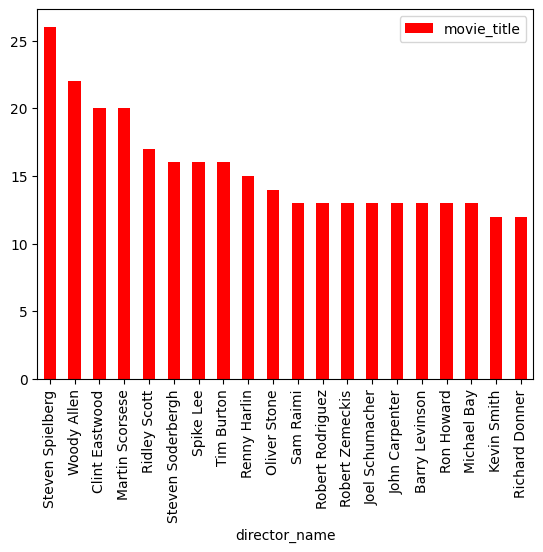

In [ ]:
linhas = 20
ds.groupby(['director_name'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar", color='red',
                                                     y='movie_title', x='director_name')

<Axes: xlabel='actor_1_name'>

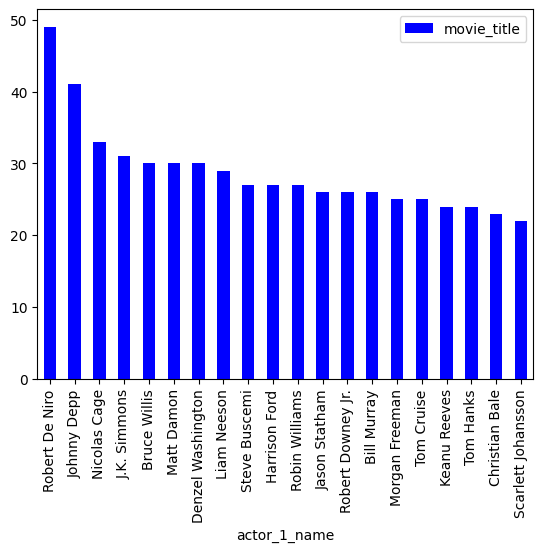

In [ ]:
linhas = 20
ds.groupby(['actor_1_name'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar", color='blue',
                                                     y='movie_title', x='actor_1_name')

<Axes: xlabel='actor_2_name'>

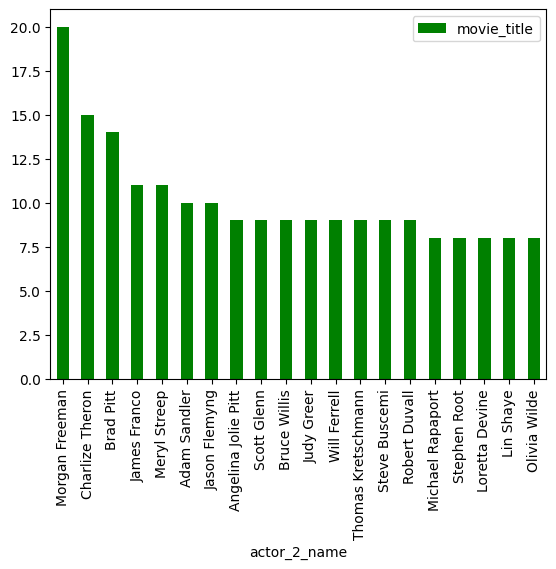

In [ ]:
linhas = 20
ds.groupby(['actor_2_name'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar", color='green',
                                                     y='movie_title', x='actor_2_name')

<Axes: xlabel='genres'>

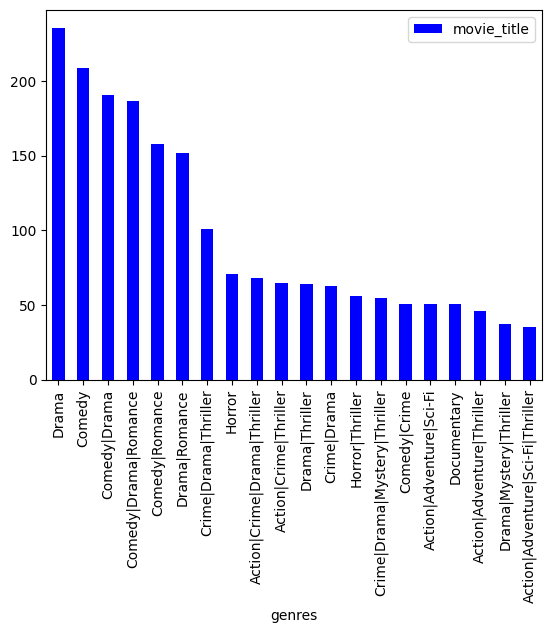

In [ ]:
linhas = 20
ds.groupby(['genres'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar", color='blue',
                                                     y='movie_title', x='genres')

<Axes: xlabel='language'>

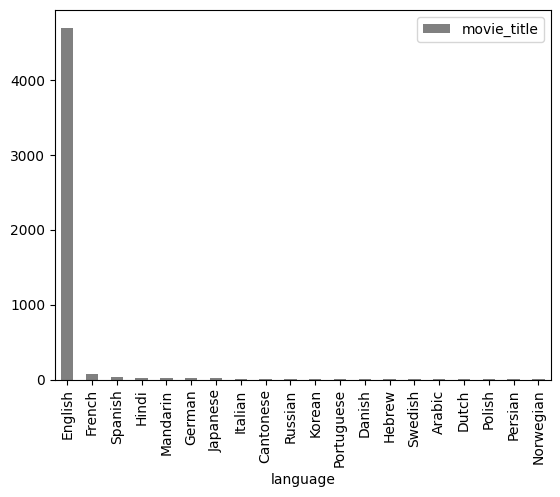

In [ ]:
linhas = 20
ds.groupby(['language'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar",
                                                           color='gray', x='language')

<Axes: xlabel='country'>

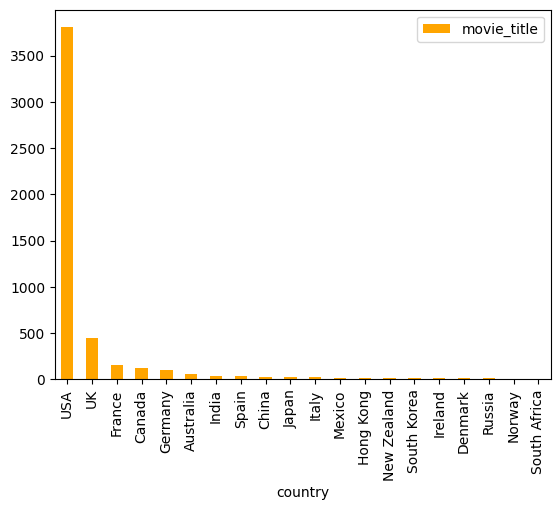

In [ ]:
linhas = 20
ds.groupby(['country'], as_index = False)['movie_title'].count().sort_values(
            'movie_title', ascending=False)[0:linhas].plot(kind = "bar",
                                                           color='orange', x='country')

In [ ]:
# # preparando os gráficos
# plt.figure(figsize= (15, 10))
# linhas = 15

# # gráfico de quantidade por diretor
# plt.subplot(4, 1, 1)
# plt.title('Lançamentos por diretor', size= 12)
# plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('diretor', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["director"], as_index = False)['title'].count().sort_values(
#             'title', ascending=False)[0:linhas].plot(kind = "bar", color='red',
#                                                      y='title', x='director')

# # gráfico de revenue por diretor
# plt.subplot(4, 1, 2)
# plt.title('revenue médio por diretor', size= 12)
# #plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('director', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["director"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='blue',
#                                                y='revenue', x='director')

# # gráfico de IMDB por ano
# plt.subplot(4, 1, 3)
# plt.title('revenue médio por linguagem', size= 12)
# plt.ylabel('revenue', size= 8)
# plt.xlabel('language', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["language"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='green',
#                                                y='revenue', x='language')

# # gráfico de Meta por ano
# plt.subplot(4, 1, 4)
# plt.title('revenue médio por genero', size= 12)
# #plt.ylabel('Lançamentos', size= 8)
# plt.xlabel('genre', size= 8)
# plt.yticks(size= 8)
# plt.xticks(size= 8)
# ds.groupby(["genres"], as_index = False)['revenue'].mean().sort_values(
#     'revenue', ascending=False)[0:linhas].plot(kind = "bar", color='black',
#                                                y='revenue', x='genres')


# # apresentando os gráficos
# plt.subplots_adjust(hspace=0.6);
# plt.show()

## A4. Pré-Processamento de dados

Nesta etapa, iremos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, e se necessário transformações.

### 4.1 Tratamento de Missings e Limpeza

Nesta fase de limpeza iremos avaliar a possível ocorrência de nulls e/ou linhas duplicadas, e fazer os devidos ajustes, se necessário.

Etapas propostas:

1. Apagar colunas desnecessárias a análise;
2. Avaliar e tratar linhas com missings;
3. Avaliar e tratar linhas com zeros;
4. Alterar o nome de algumas colunas para facilitar a análise;
5. Analisar as variaveis categóricas.




---
**Criando um novo dataset db_clean**

Iniciando a criação de uma nova base limpa e sem missings a partir da base original chamada **ds_cleaned**



In [ ]:
# salvando um novo dataset "ds_cleaned" para executar a limpeza
# recuperando os nomes das colunas
col = list(ds.columns)
# o novo dataset irá conter todas as colunas do dataset original
ds_cleaned = ds[col[:]]

print(f' dimensões do dataset antes da limpeza: {ds_cleaned.shape}')

 dimensões do dataset antes da limpeza: (5043, 28)


In [ ]:
# Checando número de valores nulls nas colunas e duplicadas
print(f'\n*** Valores Nulos ***')
print(ds_cleaned.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds_cleaned.duplicated().sum())


*** Valores Nulos ***
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

*** Linhas duplicadas ***
45


**Tratando variáveis categóricas qualitativas**
- Análise de dimensionalidade das variáveis categóricas

In [ ]:
# Verificando dimensionalidade das variaveis categóricas
d_categ = {}
for col in cols_categoricas:
#  d_categ[col]=ds_cleaned[col].nunique()
  print(f'{col}: {ds_cleaned[col].nunique()}')

color: 2
director_name: 2398
actor_2_name: 3032
genres: 914
actor_1_name: 2097
movie_title: 4917
actor_3_name: 3521
plot_keywords: 4760
movie_imdb_link: 4919
language: 47
country: 65
content_rating: 18


Da análise de dimensionalidade destas variáveis categóricas temos:
- As variáveis tem a dimensionalidade praticamente do dataset, então não contribuirão no modelo. Sendo assim serão ser descartadas.
- As variáveis 'actor_1_name', 'actor_2_name', 'actor_3_name' e 'director' tem um tamanho expressivo, e assim nao será possivel preservar estas linhas, visto que teríamos dificuldade em estabelecer a moda. Sendo assim serão eliminadas as linhas com missing nestas variáveis.
- Para as variáveis 'color', 'country' e language' devido a sua baixa dimensionalidade, serão usadas os valores da moda.
- Preenchimento dos missings da variável 'content_rating' pelo valor 'not rated'.
- A variável 'genres' não apresenta missings

In [ ]:
# Apagando colunas com dimensionalidade alta
ds_cleaned.drop(['plot_keywords','movie_title', 'movie_imdb_link'], axis=1, inplace=True)

# apagando linhas com missing nas variáveis 'actor_1_name', 'actor_2_name', 'actor_3_name' e 'director'
ds_cleaned.dropna(subset = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'], inplace=True)

# substituindo valores categórico missing pela moda
ds_cleaned['color'].fillna(ds_cleaned['color'].mode()[0], inplace=True)
ds_cleaned['country'].fillna(ds_cleaned['country'].mode()[0], inplace=True)
ds_cleaned['language'].fillna(ds_cleaned['language'].mode()[0], inplace=True)

# preenchendo missings em 'content_rating' pelo valor 'not rated'
ds_cleaned['content_rating'].fillna('Not Rated', inplace = True)

**Tratando variáveis numéricas**
- Análise dos 0s (zeros)

Vamos tratar os valores missing e também os valores 0 (zero) que não fazem sentido.

Os valores 0 devem ser considerados como valor missing , exceto para o caso da variável preditora "facenumber_in_poster".

Assim, a sequencia da célula será:
- Substituir NA pela média da coluna para facenumber_in_poster;
- Substituir os 0s nas outras variáveis preditoras por NA ;
- Substituir variáveis preditoras pela mediana ou moda:
 - Substituição de variáveis numéricas pela mediana;
 - Substituição de variáveis categóricas qualitativas pela moda;
- Prrencher missing das variáveis que contém nomes de atores, diretor e "content_rating" por valores especificos;
- Retornar o 0(zero) válido em preditora "facenumber_in_poster".

In [ ]:
# Como o zero aqui faz sentido, subsituindo missing pelo valor da mediana
ds_cleaned['facenumber_in_poster'].fillna(ds_cleaned['facenumber_in_poster'].median(), inplace=True)

# substituindo os zeros por NaN
ds_cleaned.replace(0, np.nan, inplace=True)

# Substituir algumas das variáveis numéricas pela mediana (pode haver outliers)
ds_cleaned['num_critic_for_reviews'].fillna(ds_cleaned['num_critic_for_reviews'].median(), inplace=True)
ds_cleaned['duration'].fillna(ds_cleaned['duration'].median(), inplace=True)
ds_cleaned['director_facebook_likes'].fillna(ds_cleaned['director_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_1_facebook_likes'].fillna(ds_cleaned['actor_1_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_2_facebook_likes'].fillna(ds_cleaned['actor_2_facebook_likes'].median(), inplace=True)
ds_cleaned['actor_3_facebook_likes'].fillna(ds_cleaned['actor_3_facebook_likes'].median(), inplace=True)
ds_cleaned['movie_facebook_likes'].fillna(ds_cleaned['movie_facebook_likes'].median(), inplace=True)
ds_cleaned['cast_total_facebook_likes'].fillna(ds_cleaned['cast_total_facebook_likes'].median(), inplace=True)
ds_cleaned['num_user_for_reviews'].fillna(ds_cleaned['num_user_for_reviews'].median(), inplace=True)
ds_cleaned['title_year'].fillna(ds_cleaned['title_year'].median(), inplace=True)
ds_cleaned['aspect_ratio'].fillna(ds_cleaned['aspect_ratio'].mode()[0], inplace=True)

# preenchendo missings nos nomes dos atores e diretor com 'unknown'
# ds_cleaned['actor_1_name'].fillna('Unknown', inplace = True)
# ds_cleaned['actor_2_name'].fillna('Unknown', inplace = True)
# ds_cleaned['actor_3_name'].fillna('Unknown', inplace = True)
# ds_cleaned['director_name'].fillna('Unknown', inplace = True)

# retornando os valores 0 da variavel 'facenumber_in_poster'
ds_cleaned['facenumber_in_poster'].fillna(0, inplace=True)

# Apagando linhas de 'budget', 'gross' com valores missing
ds_cleaned.dropna(subset = ['budget', 'gross'], inplace=True)

**Apagando linhas duplicadas**


In [ ]:
# Apagando linhas duplicadas
ds_cleaned.drop_duplicates(inplace = True)

**Confirmando a ausência de missings**

<Axes: >

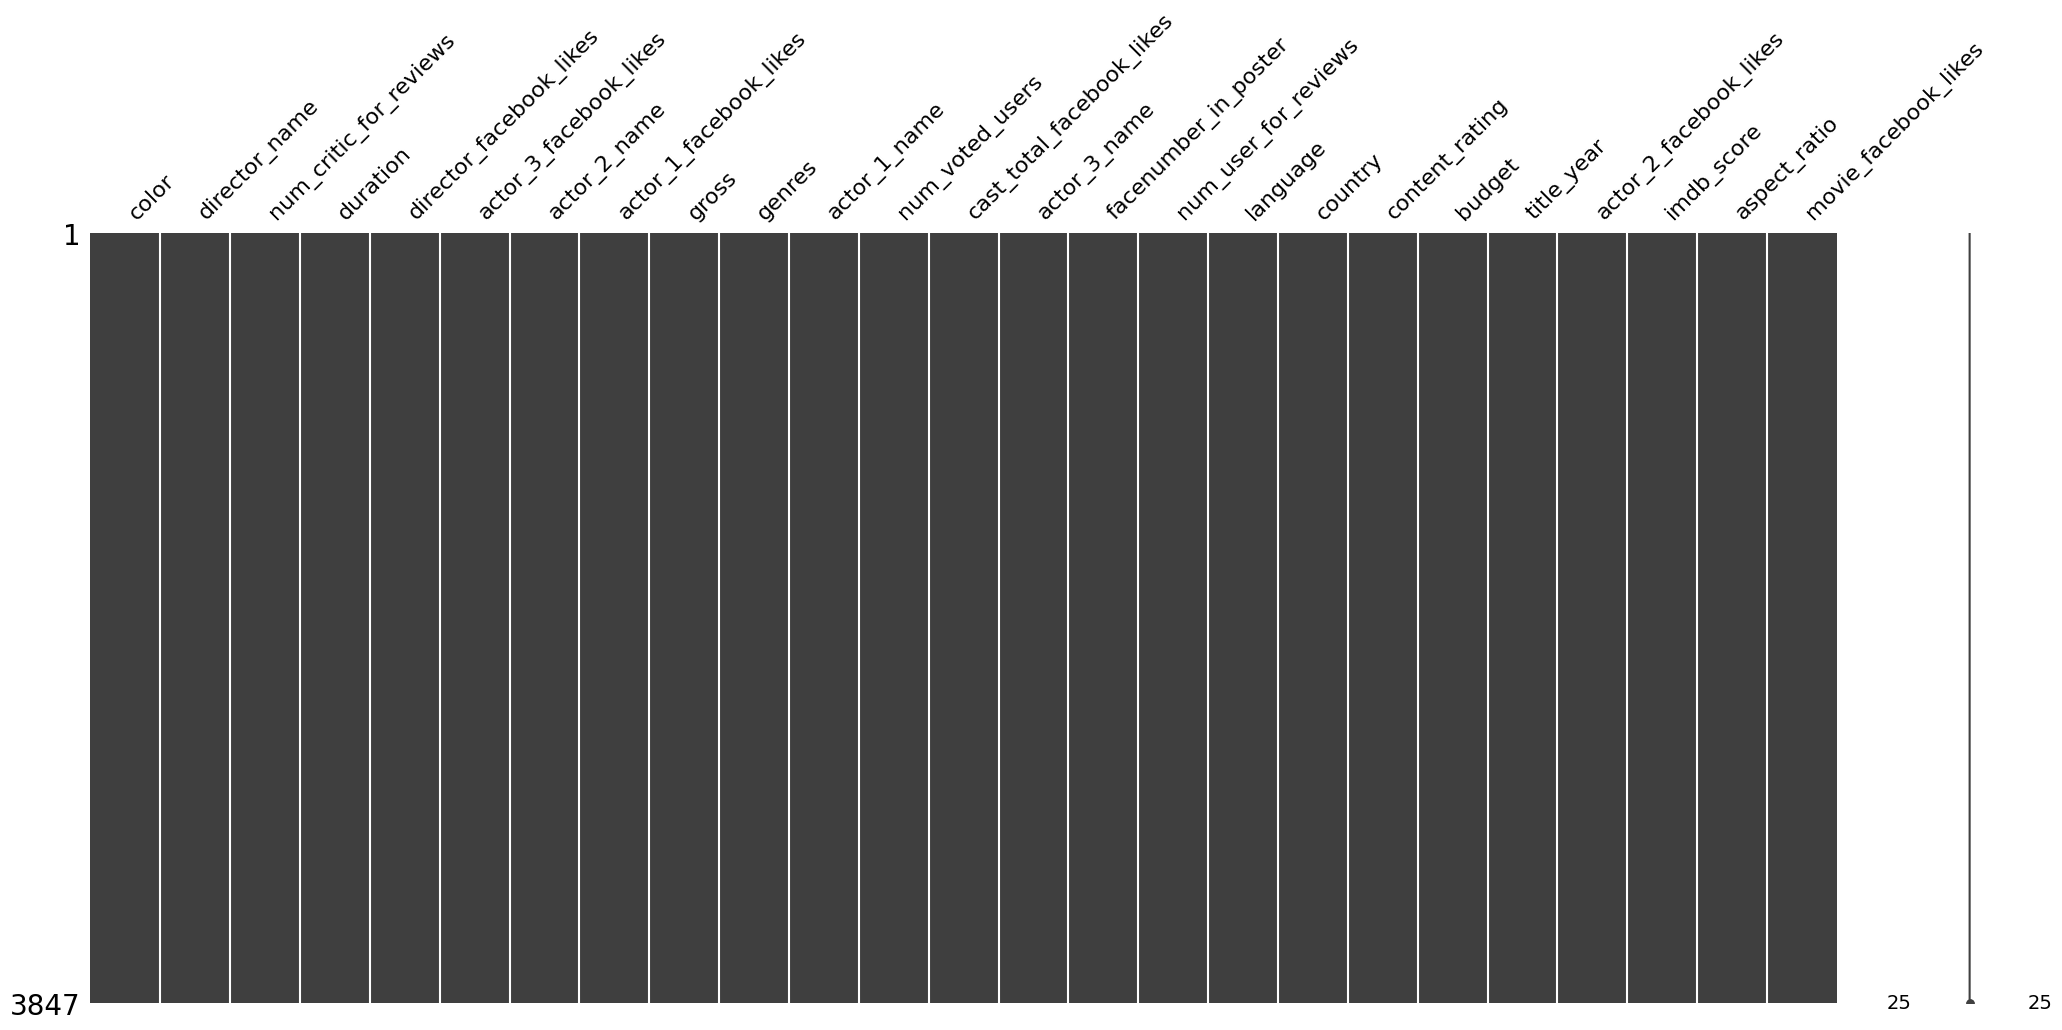

In [ ]:
# Confirmando a não existencia de missings
#ds_cleaned.isnull().sum()
#ds_cleaned.isna().any()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_cleaned)

**Escalando variaveis para o modelo**

In [ ]:
ds_cleaned['budget']=ds_cleaned['budget'] / 1000000
ds_cleaned['gross']=ds_cleaned['gross'] / 1000000

In [ ]:
# Checando
ds_cleaned.isna().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

**Valores finais da based limpa**

In [ ]:
# Tamanho da base limpa
ds_cleaned.shape

(3847, 25)

### 4.2 Pré-processamento dos dados

**Transformação das variáveis categóricas**

Preparando um novo dataset "dsmodel" para ser utilizado no modelo

In [ ]:
dsmodel=ds_cleaned[:]

**Reduzindo Dimensionalidade de Variáveis Categóricas**
- Verificando possibilidade de redução da dimensionalidade (quantidade de classes) das variáveis 'language' e 'country'.


In [ ]:
dsmodel['country'].value_counts()

USA               3042
UK                 319
France             105
Germany             81
Canada              63
Australia           41
Spain               22
Japan               17
China               14
Hong Kong           13
India               13
Mexico              11
New Zealand         11
Italy               11
Denmark              9
South Korea          9
Ireland              7
Brazil               5
Norway               4
Iran                 4
Thailand             4
South Africa         3
Argentina            3
Czech Republic       3
Netherlands          3
Russia               3
Taiwan               2
Iceland              2
Belgium              2
Israel               2
Hungary              2
Romania              2
Poland               1
Indonesia            1
Colombia             1
Afghanistan          1
Sweden               1
Chile                1
Finland              1
Georgia              1
West Germany         1
Official site        1
Greece               1
Aruba      

Do resultado, podemos observar que a maioria dos filmes é produzida nos EUA, e Reino Unido(cerca de 85%). Assim vamos substituir os outros por 1 categoria chamada 'other'

In [ ]:
#Substituindo valores (exceto USA e UK) por 'other'
countries = ['USA','UK', 'France']
dsmodel['country'] = dsmodel['country'].where(dsmodel['country'].isin(countries), 'other')
dsmodel['country'].value_counts()

USA       3042
other      381
UK         319
France     105
Name: country, dtype: int64

In [ ]:
dsmodel['language'].value_counts()

English       3668
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

Da saída acima, podemos observar que a maioria dos filmes tem o inglês como idioma (cerca de 95%). Assim vamos substituir os outros por 1 categoria chamada 'other'

In [ ]:
#Substituindo todos os valores (exceto 'English') por 'other'
most_occurred_language = ['English']
dsmodel['language'] = dsmodel['language'].where(dsmodel['language'].isin(most_occurred_language), 'other')
dsmodel['language'].value_counts()

English    3668
other       179
Name: language, dtype: int64

**Checando correlações entre as variáveis preditoras**

<Axes: >

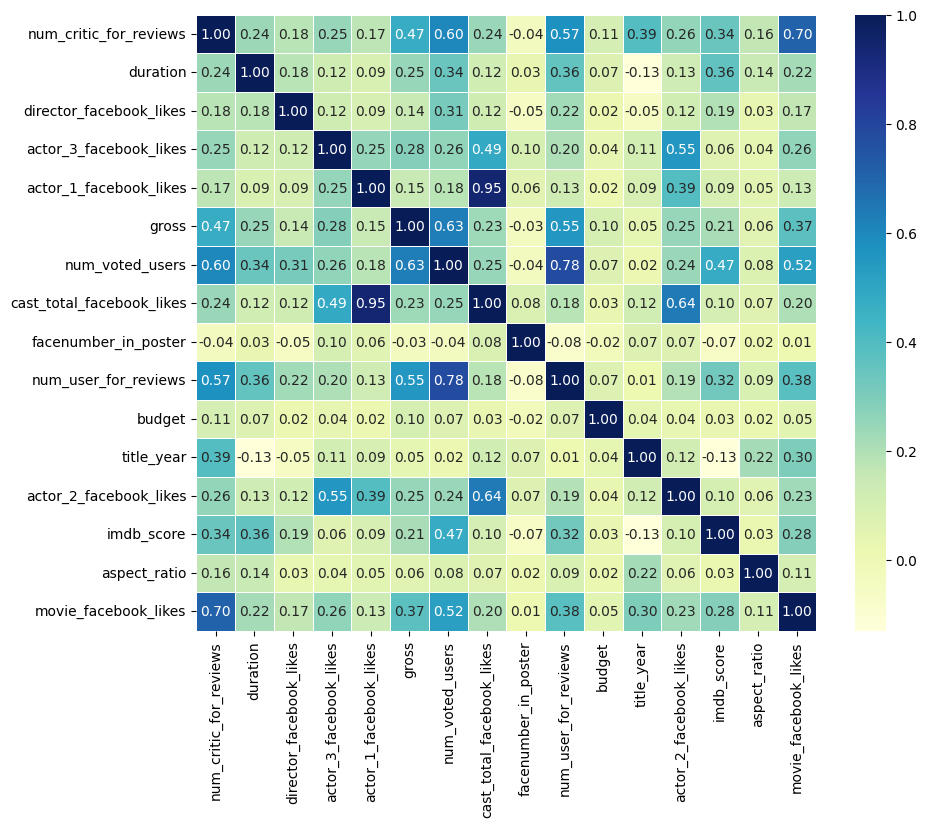

In [ ]:
correlation = dsmodel.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", linewidths=.5,fmt='.2f')

No resultado acima observa-se que 'actor_1_facebook_likes' e 'cast_total_facebook_likes' são altamente correlacionados entre si.

Então iremos apagar 'cast_total_facebook_likes'

In [ ]:
# apagando coluna com alta correlação
dsmodel.drop('cast_total_facebook_likes',axis=1,inplace=True)



---





In [ ]:
# # Get number of unique entries in each column with categorical data
# object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
# d = dict(zip(object_cols, object_nunique))

# # Print number of unique entries by column, in ascending order
# sorted(d.items(), key=lambda x: x[1])

In [ ]:
# # Get number of unique entries in each column with categorical data
# object_nunique = list(map(lambda col: X_test[col].nunique(), object_cols))
# d = dict(zip(object_cols, object_nunique))

# # Print number of unique entries by column, in ascending order
# sorted(d.items(), key=lambda x: x[1])



---



### 4.3 Separando os conjuntos de treino e de teste




Nesta fase iremos estabelecer os dados de treino e de testes. Os dados de treino  será usado no treino do futuro modelo preditivo e os de testes serão usados para aferir a eficácia do modelo escolhido.


> A variável alvo é "imdb_score".




**Separando as variáveis preditoras e alvo**
- Separando dados de treino 80% e teste 20%
- Criando folds para validação cruzada

In [ ]:
# Especificando as colunas a serem usadas no treino
col_y = ['imdb_score']

# Separando atributos preditores e alvo
X = dsmodel[:].drop(col_y, axis = 1)  # variaveis preditoras
y = dsmodel[col_y[:]] # variavel alvo

# checando os conjunto criados
# print(f'Variaveis preditoras: \n {X[0:5]}')
# print(f'Variavel Alvo: \n {y[0:5]}')

# definindo parametros de teste/treino
test_size = 0.20 # tamanho do conjunto de testes.
seed = 7 # semente geradora dos numeros aleatórios

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}\nX_test: {X_test.shape}, y_test: {y_test.shape}')

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

X_train: (3077, 23), y_train: (3077, 1)
X_test: (770, 23), y_test: (770, 1)


**Transformação das variáveis categóricas**
- Antes de comerçarmos a transformação vamos verificar se algum atributo provocará uma distribuição de dados desbalanceada entre dados de treino e de teste
- Para isto vamos checar se as categorias existentes nos dados de treino também aparecem nos dados de teste

LABEL ENCODER

In [ ]:
# # Listando os atributos categóricos
# object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# # As colunas que poderão ser codificadas tem instâncias em ambos os dados
# good_label_cols = [col for col in object_cols if
#                    set(X_train[col]) == set(X_test[col])]

# # atributos problemáticas que serão descartados do conjunto de dados
# bad_label_cols = list(set(object_cols)-set(good_label_cols))

# print('Colunas categóricas que serão codificadas:', good_label_cols)
# print('\nColunas categóricas que serão descartadas:', bad_label_cols)

# # apagando colunas descartadas de X_train e X_test
# X_train.drop(bad_label_cols, axis=1, inplace=True) # treino
# X_test.drop(bad_label_cols, axis=1, inplace=True) # treino

Colunas categóricas que serão codificadas: ['color', 'language', 'country']

Colunas categóricas que serão descartadas: ['director_name', 'actor_1_name', 'content_rating', 'actor_2_name', 'genres', 'actor_3_name']


In [ ]:
# # Convertendo as colunas categóricas para numéricas
# from sklearn.preprocessing import LabelEncoder
# labelencoding = LabelEncoder()
# X_train[good_label_cols]=X_train[good_label_cols].apply(lambda x:labelencoding.fit_transform(x)) # treino
# X_test[good_label_cols]=X_test[good_label_cols].apply(lambda x:labelencoding.fit_transform(x)) #teste

ONE HOT ENCODING

In [ ]:
# Listando os atributos categóricos
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

# apagando colunas descartadas de X_train e X_test
X_train.drop(high_cardinality_cols, axis=1, inplace=True) # treino
X_test.drop(high_cardinality_cols, axis=1, inplace=True) # teste

Categorical columns that will be one-hot encoded: ['color', 'language', 'country']

Categorical columns that will be dropped from the dataset: ['actor_2_name', 'content_rating', 'director_name', 'actor_3_name', 'genres', 'actor_1_name']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1) # Your code here
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1) # Your code here

In [ ]:
X_train.shape

(3077, 17)

In [ ]:
print(y_train.head())

      imdb_score
4047         7.8
4309         6.2
2397         6.7
1535         6.0
4255         7.6


### **4.4 Selecionando atributos**
Preparando a função para a avaliação e a seleção dos atributos mais adequados para uso no modelo.

In [ ]:
# Função SelectKBest
def selectk_best(num_atributos, imprime):
# Seleção de atributos com SelectKBest
  best_var = SelectKBest(score_func=f_regression, k=num_atributos)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
  fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
  features = fit.transform(X_train)

# Resultados
  print('\nNúmero original de atributos:', X_train.shape[1])
  print('Número reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
  if imprime:
    print("\nAtributos Originais:", X_train.columns)

# Exibe as pontuações de cada atributos e os escolhidos (com as pontuações mais altas)

  np.set_printoptions(precision=3) # 3 casas decimais
  ncol_X= best_var.get_feature_names_out(input_features=X_train.columns)
  if imprime:
    print("\nScores dos Atributos Originais:", fit.scores_)
    print("\nAtributos Selecionados:",ncol_X)

  return ncol_X

Definindo os novos atributos preditores baseado na seleção prévia

## A5. Modelagem e Inferência




### 5.1 Criação e avaliação de modelos: linha base

**Modelagem Inicial**

Para a base de treino, serão utilizados os algoritmos de ML para regressão abaixo para se avaliar o MSE e o RMSE dos modelos treinados:

- Regressão linear;
- Regressão linear com regularização Ridge;
- Regressão linear com regularização Lasso;
- KNN;
- árvore de regressão;
- SVM

**Definindo o numero e os atributos a serem usados no modelos**

Nesta etapa, utilizando a função selectk_best serão avaliados diversos valores de atributos para buscar aquele cuja a seleção dê o menor MSE.


Número original de atributos: 17
Número reduzido de atributos: 6
LR: MSE 0.782 (0.085) - RMSE 0.884
Ridge: MSE 0.782 (0.085) - RMSE 0.884
Lasso: MSE 0.784 (0.085) - RMSE 0.886
KNN: MSE 0.980 (0.116) - RMSE 0.990
CART: MSE 1.190 (0.118) - RMSE 1.091
SVM: MSE 0.848 (0.095) - RMSE 0.921

Número original de atributos: 17
Número reduzido de atributos: 8
LR: MSE 0.753 (0.080) - RMSE 0.868
Ridge: MSE 0.753 (0.080) - RMSE 0.868
Lasso: MSE 0.785 (0.084) - RMSE 0.886
KNN: MSE 0.967 (0.102) - RMSE 0.984
CART: MSE 1.212 (0.146) - RMSE 1.101
SVM: MSE 0.845 (0.094) - RMSE 0.919

Número original de atributos: 17
Número reduzido de atributos: 10
LR: MSE 0.718 (0.077) - RMSE 0.847
Ridge: MSE 0.718 (0.077) - RMSE 0.847
Lasso: MSE 0.769 (0.083) - RMSE 0.877
KNN: MSE 0.967 (0.101) - RMSE 0.983
CART: MSE 1.122 (0.111) - RMSE 1.059
SVM: MSE 0.845 (0.094) - RMSE 0.919

Número original de atributos: 17
Número reduzido de atributos: 12
LR: MSE 0.718 (0.076) - RMSE 0.847
Ridge: MSE 0.718 (0.076) - RMSE 0.847
L

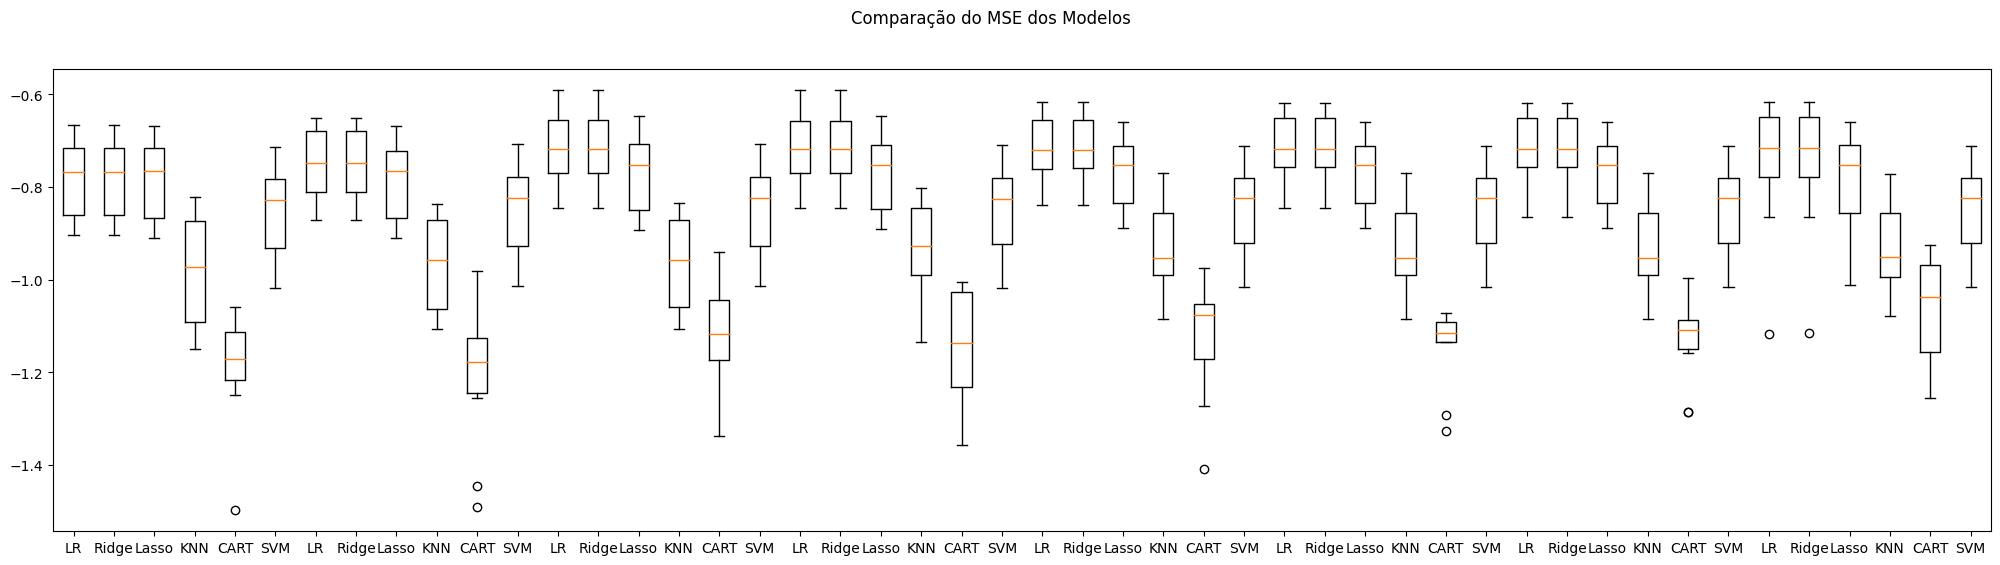

In [ ]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Valores de k a serem testados
k_values = (6, 8, 10, 12, 14, 15, 16, 17)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Testando o conjunto de atributos selecionados
for i in k_values:
  col_sel = selectk_best(i, False)
  X_train_base = X_train[col_sel[:]]# variaveis preditoras
  X_test_base = X_test[col_sel[:]]# variaveis preditoras

# Avaliando um modelo por vez
  for name, model in models:
    cv_results = cross_val_score(model, X_train_base, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos resultados da validação cruzada
    msg = "%s: MSE %0.3f (%0.3f) - RMSE %0.3f" % (name, abs(cv_results.mean()),
                                                  cv_results.std(),
                                                  np.sqrt(abs(cv_results.mean())))
    print(msg)

# Boxplot de comparação dos modelos
fig=plt.figure(figsize=(25,6))
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Os modelos de Regressão linear, Regressão linear com regularização Ridge e Regressão linear com regularização Lasso apresentaram resultados semelhantes, com ligeira vantagem para o modelo Regressão linear.

Construindo um novo modelo baseado em regressão Linear com todo conjunto de treino, para então ser avaliado utilizando a base de teste.

In [ ]:
# Criando um modelo LR com todo o conjunto de treino
model = LinearRegression()
#model = Lasso()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.64
RMSE 0.80


### 5.3 Criação e avaliação de modelos: pipelines
Nesta sessão iremos montar um pipeline de testes dos modelos, utilizamod os dados de treino em 3 formas: raw (sem transformação), padronizados e normalizados.
O objetivo é elencar qual(ais) os modelos tem maior acurácia.

LR-orig: -0.863 (0.078)
Ridge-orig: -0.863 (0.077)
Lasso-orig: -0.884 (0.058)
CART-orig: -1.031 (0.082)
KNN-orig: -0.964 (0.054)
SVR-orig: -0.918 (0.050)
LR-padr: -0.863 (0.078)
Ridge-padr: -0.863 (0.078)
Lasso-padr: -1.059 (0.038)
CART-padr: -1.015 (0.060)
KNN-padr: -0.872 (0.048)
SVR-padr: -0.773 (0.054)
LR-norm: -0.863 (0.078)
Ridge-norm: -0.856 (0.061)
Lasso-norm: -1.059 (0.038)
CART-norm: -1.031 (0.061)
KNN-norm: -0.844 (0.043)
SVR-norm: -0.825 (0.052)


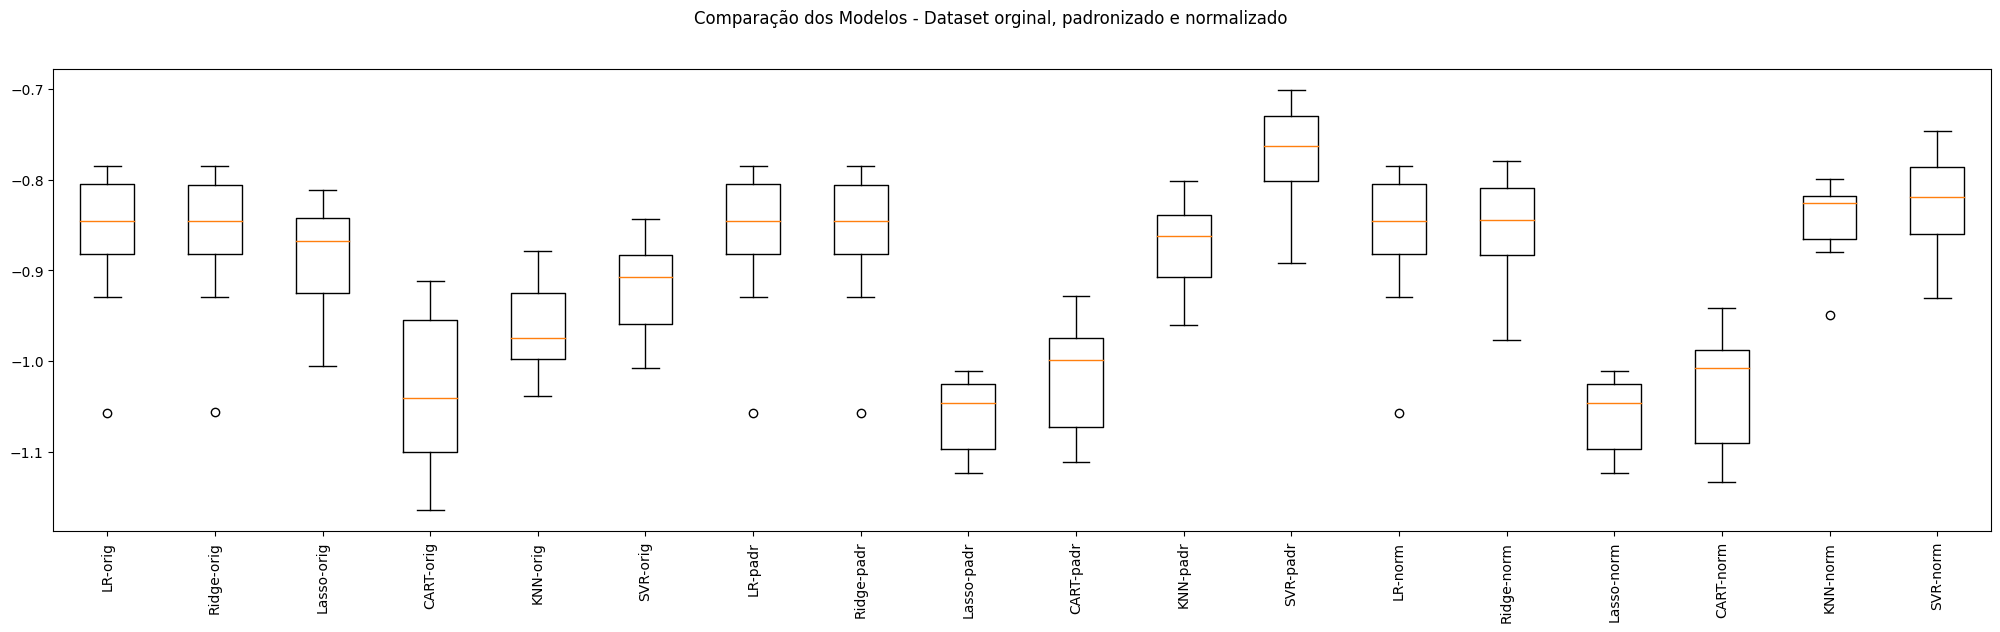

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
linear_reg = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
cart = ('CART', DecisionTreeRegressor())
knn_reg = ('KNN', KNeighborsRegressor())
svr = ('SVM', SVR())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([linear_reg])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('Lasso-orig', Pipeline([lasso])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('KNN-orig', Pipeline([knn_reg])))
pipelines.append(('SVR-orig', Pipeline([svr])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, linear_reg])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn_reg])))
pipelines.append(('SVR-padr', Pipeline([standard_scaler, svr])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, linear_reg])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn_reg])))
pipelines.append(('SVR-norm', Pipeline([min_max_scaler, svr])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

O modelo SVR com dados normalizados apresentou a melhor performance dentre os modelos de regressão avaliados.

### 5.4 Otimização dos hiperparâmetros
Nesta fase iremos utilizar os resultados obtidos nos pipelines de avaliação de modelo, procurando otimiza-lo ainda mais por meio de alterações dos hiperparâmetros.

Utilizando a melhor configuração de regressor



In [ ]:
# Tuning do SVC

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svr = ('SVM', SVR())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svr-orig', Pipeline(steps=[svr])))
pipelines.append(('svr-padr', Pipeline(steps=[standard_scaler, svr])))
pipelines.append(('svr-norm', Pipeline(steps=[min_max_scaler, svr])))

# param_grid = { 'SVM__C': [0.1, 1, 10, 100, 1000],
#              'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'SVM__kernel': ['rbf','linear']}

param_grid = { 'SVM__C': [0.1, 1, 10, 100, 1000],
               'SVM__kernel': ['rbf']}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: svr-orig - Melhor: -0.912606 usando {'SVM__C': 1000, 'SVM__kernel': 'rbf'}
Sem tratamento de missings: svr-padr - Melhor: -0.760154 usando {'SVM__C': 10, 'SVM__kernel': 'rbf'}
Sem tratamento de missings: svr-norm - Melhor: -0.793099 usando {'SVM__C': 100, 'SVM__kernel': 'rbf'}


### 5.5 Finalização do Modelo


Vamos usar as metricas e resultados da otimização do modelo regressor para alimentar os hiperparametros.

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
#model = KNeighborsRegressor(metric='manhattan', n_neighbors=7)
model=SVR(C=10, kernel='rbf')
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

#print(accuracy_score(y_test, predictions))

print(f'Real:\n{y_test[0:10]}  \nPrevisto:\n{predictions[0:10]}')
# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

Real:
      imdb_score
883          6.3
844          6.3
2421         7.1
354          6.8
668          6.0
2332         6.7
1480         3.8
1077         5.8
2707         5.5
1679         5.2  
Previsto:
[7.479 6.563 6.179 6.318 6.331 5.785 5.172 6.454 5.886 5.651]
MSE 0.47
RMSE 0.69


## **A6. Conclusão**



---

O objetivo desta análise foi o de buscar prever a pontuação IMDB de um determinado lançamento original futuro da Netflix utilizando a base NetflixOriginals. Este é um problema de aprendizado supervisionado por regressão.
As variáveis envolvidas foram:
1.	Title (“Titulo”) - Título do filme
2.	Genre (“Genero”) - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime (“Duracao”) - Tempo de execução do filme em minutos
5.	IMDB Score (“IMDB”) - Pontuações do IMDB que indicam a aceitação do público para o produto original lançado
6.	Language (“Linguagem”) - Linguagem na qual o filme foi produzido

A variável "Premiere" foi desdobrada em 4 novas variáveis:

7. Data - Data do lançamento
8.	Ano – Ano dos lançamentos;
9.	Mês – Mês dos lançamentos;
10.	DiaSemana – dia da semana dos lançamentos

**Com relação a análise, em função da duração dos filmes:**

•	Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB).

•	Aparentemente as maiores pontuações IMDB se situam em volta da média de duração (90 minutos), com até uma variação correspondente a um desvio padrão de distância (30 minutos).

•	Os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem avaliações mais altas em comparação a média.

•	Observou-se uma leve tendência de queda na pontuação média anual dos lançamentos desde 2015, inversamente proporcional a quantidade de lançamentos, o que pode sugerir uma estratégia da Netflix em privilegiar a quantidade em detrimento à qualidade dos lançamentos.

**A análise do gênero e linguagem mostrou o seguinte:**

•	A análise sugere que existem linguagens com melhor pontuação. Os filmes na linguagem em inglês (*English*), que tem uma amostragem maior, apresentaram uma pontuação IMDB próxima a média; outras linguagens como *japonês, espanhol, português, marathi, e Hindi* apresentaram comportamento similar, sugerindo possível relação.

•	Sobre os gêneros, a análise mostrou alguma relação com o tipo de gênero e sua pontuação. Os gêneros *Documentary*, *Drama* parecem serem os mais bens aceitos, com pontuação acima da média.

•	O gênero *Documentary* foi o único lançado nos anos de 2014 e 2015, o que explica a grande diferença de quantidade de títulos deste gênero em relação ao segundo colocado.

•	A linguagem "inglês" (English) foi a única lançada em 2014 a 2017, com exceção em 2016 quando o espanhol (*Spanish*) também foi utilizado, o que explica a grande diferença na quantidade de títulos em inglês em relação ao segundo colocado.


**Sobre o pré-processamento dos dados:**

- A base analisada não continha elementos duplicados, faltantes e nem nulos.

- Foi possível criar conjunto de treino e conjunto de teste para treinar um futuro modelo.

- Foi aplicada transformação categórica nas variáveis quantitativas dos conjuntos de teste e treino.

**Palavras finais:**

Com base nestas observações e percepções, creio ser possível a construção de um modelo para predizer o valor da pontuação IMDB dos filmes com base nas variáveis preditoras "Language" ("Linguagem"), "Genre" ("Gênero"), "Premiere" (suas derivadas "Ano", "Mes", "DiaSemana") e "Runtime" ("Duracao").

Seria interessante completar o dataset com os anos 2021 (2a metade), 2022 e 2023 para avaliar se o comportamento estudado das variáveis se mantém.

Finalmente, observo que baseado em pesquisas realizadas em outros datasets similares, creio que o acréscimo de novas variáveis como por exemplo “ator principal” e “diretor”, podem melhorar o processo de predição.

---



# **B. MVP DEEP LEARNING**

## ROBERTO HARKOVSKY DA CUNHA

### Base IMDB Dataset of 50K Movie Reviews

## B1. Definição do problema

O negócio de entretenimento cinematográfico busca não somente gerar conteúdos que entretenham seu público, mas também, como qualquer outra empresa, visa obteção de lucros. Um dos fatores positivos para prever o sucesso comercial de um filme é o sentimento associado a sua história.

Utilizaremos um  dataset que consiste em 50.000 filmes e suas  resenhas com sua classificação de sentimento positivo ou negativo.


Sobre o dataset:
O dataset escolhido é o "IMDB Dataset of 50K Movie Reviews" do Kaggle, com cerca de 50.000 críticas de filmes para processamento de linguagem natural ou análise de texto, e o sentimento público de gerado por cada crítica.

Informações sobre os atributos:

1. Review - Critica textual do filme
2. Sentiment - classificação do sentimento da critica do filme: positiva ou negativo (positive ou negative)

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


O objetivo é treinar um modelo de deep learning para prever se, dada uma avaliação, é possível prever o sentimento associado a ela.


## B2. Carga de dados
Nesta  etapa será feita a importação dos pacotes necessários a análise, e a carga do dataset.

### Importando Biliotecas

Importanto as bibliotecas complementares para o deep learning

In [ ]:
import re
import nltk
import random

from scipy import stats

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### *Preparando o Dataset*

In [ ]:
# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')
arquivo = "IMDB Dataset.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# # Conexão com GitHub
# arquivo = "movie_metadata.csv"
# url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo

# carga do dataset através do csv
dsdeep = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

Informações sobre o dataset

In [ ]:
# Exibe tamanho do dataset
print(f'\033[1mDimensões:\033[0m {dsdeep.shape}\n')

# exibe as 5 primeiras linhas
print(f'\033[1mAmostra dos dados:\033[0m')
print(dsdeep.head())

# Avalia a quantidade de sentimentos positivos e negativos
print(f'\033[1m \nContagem de sentimentos:\033[0m')
print(f'{dsdeep.sentiment.value_counts()}\n')

# mostra demais informações
print(f'\033[1m \nDemais informações do dataset\033[0m')
print(f'{dsdeep.info()}')

Dimensões: (50000, 2)

Amostra dos dados:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
 
Contagem de sentimentos:
positive    25000
negative    25000
Name: sentiment, dtype: int64

 
Demais informações do dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


Para tornar o Dataset adequado para análise, convertendo os valores da variável "sentiment" em números inteiros:
- Negativo em 0
- Positivo em 1

In [ ]:
dsdeep.sentiment = [1 if s == 'positive' else 0 for s in dsdeep.sentiment]
dsdeep.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## B3. Pré-processamento de dados
Antes de iniciar a análise, precisamos extrair caracteres não alfa-numéricos, stop-words e reduzir as palavras ao seu radical.



### Pre-processamento do texto
Vamos iniciar realizando as transformações no texto da "review". Para isto, usamos expressões regulares para fazer as seguintes transformações no conteúdo das revisões:

- Remover URL's
- Remover sinais de pontuação
- Remover tags HTML
- Remover caracteres que não sejam letras ou dígitos
- Remover espaços em branco sucessivos
- Converter o texto para minúsculas
- Remover os espaços em branco do início e do final das revisões

In [ ]:
# Pre-processando o texto

# definindo a função de limpeza
def processa_texto(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

#salvando uma amostra antes do processamento
idx = random.randint(0, len(dsdeep)-1)
before_process = dsdeep.iloc[idx][0]

# Processando o texto
dsdeep['review'] = dsdeep['review'].apply(lambda x: processa_texto(x))

#verificando a a amostra processada
after_process = dsdeep.iloc[idx][0]

# Averiguando a transformação em uma amostra
print(f'{before_process}')
print(f'{after_process}')

This movie was for a while in my collection, but it wasn't before a friend of mine reminded me about it Â until I decided that I should watch it. I did not know much about Close to Leo Â just that it was supposed to be excellent coming out of age movie and it deals with a very serious topic Â Aids. <br /><br />Although the person who has aids Â is Leo Â the scenario wraps around the way in which Marcel (the youngest brother of Leo) coupes with the sickness of his relative. At first everyone is trying to hide the truth from Marcel Â he is believed to be too young to understand the sickness of his brother Â the fact that Leo is also a homosexual contributes to the unwillingness of the parents to discus the matter with the young Marcel. I know from experience that on many occasions most older people do not want to accept the fact that sometimes even when someone is young this does not automatically means that he will not be able to accept the reality and act in more adequate manner

**Tratando as stop-words**

Continuando o tratamento do texto de "review", vamos tratar agora as stop-words. Note que estamos tratando a lingua inglesa, na qual estão ecritas as revisões.

Baixando pacotes necessários

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# - Armazenando em "sw_set" o conjunto de stopwords em inglês fornecido pelo nltk
sw_set = set(nltk.corpus.stopwords.words('english'))

# - Definindo e aplicando a função "sw_remove" que remove stopwords das avaliações
def sw_remove(x):
    words = nltk.tokenize.word_tokenize(x)
    filtered_list = [word for word in words if word not in sw_set]
    return ' '.join(filtered_list)

dsdeep['review'] = dsdeep['review'].apply(lambda x: sw_remove(x))

# Armazenando em "after_removal" o exemplo de revisão a partir daquele salvo em after_process
after_removal = sw_remove(after_process)

# Averiguando a transformação da amostra selecionada anteriormente
print(f'{before_process}')
print(f'{after_process}')
print(f'{after_removal}')

this movie was for a while in my collection but it wasn t before a friend of mine reminded me about it until i decided that i should watch it i did not know much about close to leo just that it was supposed to be excellent coming out of age movie and it deals with a very serious topic aids although the person who has aids is leo the scenario wraps around the way in which marcel the youngest brother of leo coupes with the sickness of his relative at first everyone is trying to hide the truth from marcel he is believed to be too young to understand the sickness of his brother the fact that leo is also a homosexual contributes to the unwillingness of the parents to discus the matter with the young marcel i know from experience that on many occasions most older people do not want to accept the fact that sometimes even when someone is young this does not automatically means that he will not be able to accept the reality and act in more adequate manner then even themselves with exception of 

### Separando os conjuntos de treino e de teste

Nesta fase iremos estabelecer os dados de treino e de testes. Os dados de treino  será usado no treino do futuro modelo de deep learning


In [ ]:
# Separando atributos preditores e alvo
X = dsdeep['review'] # variaveis preditoras
y = dsdeep['sentiment'] # variavel alvo

# definindo parametros de teste/treino
test_size = 0.10 # tamanho do conjunto de testes.
seed = 9 # semente geradora dos numeros aleatórios

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (45000,)
X_test: (5000,)
y_train: (45000,)
y_test: (5000,)


### Divisão de dados e tokenização
A tokenização é o processo de troca de dados específicos por outros dados não confidenciais chamados “tokens” que podem ser usados em um dataset. Embora os tokens sejam valores não relacionados, eles retêm certos elementos dos dados originais.

Nesta nossa análise, usaremos a classe *Tokenizer* para criar um dicionário das palavras mais frequentes presentes nas "reviews", que será um número inteiro único que será atribuído a cada palavra.

Importante notar que para uma geração de tokens homogenea nos dados, a geração de tokens na análise é feita sobre os dados originais do dataset (dsdeep['review']).


In [ ]:
from keras.preprocessing.text import Tokenizer

dict_size = 35000
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(dsdeep['review'])

# Verificando alguns valores
print('\033[1m' + 'Tamanho do dicionário:' + '\033[0m', dict_size)
print('\033[1m' + 'Comprimento do índice do tokenizador:' + '\033[0m', len(tokenizer.word_index))
print('\033[1m' + 'Número de documentos em que o tokenizador foi treinado:' + '\033[0m', tokenizer.document_count, '\n')
print('\033[1m' + 'Primeiras 20 entradas do índice do tokenizador:' + '\033[0m')
print(*list(tokenizer.word_index.items())[:20])

Tamanho do dicionário: 35000
Comprimento do índice do tokenizador: 125791
Número de documentos em que o tokenizador foi treinado: 50000 

Primeiras 20 entradas do índice do tokenizador:
('movie', 1) ('film', 2) ('one', 3) ('like', 4) ('good', 5) ('time', 6) ('even', 7) ('would', 8) ('really', 9) ('story', 10) ('see', 11) ('well', 12) ('much', 13) ('get', 14) ('bad', 15) ('people', 16) ('great', 17) ('also', 18) ('first', 19) ('made', 20)


A seguir vamos converter os dados de treinamento e de teste das "reviews" no seu correspondente com token e também vamos armamezar o comprimento das sequencias em uma nova array para uso na análise.

In [ ]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
seq_lengths =  np.array([len(sequence) for sequence in X_train_tokens])

Vamos precisar agora do valor do comprimento máximo das sequencias.

Em seguida vamos definir o limite superior referente ao comprimento das sequencias de review. Para isto vamos assumir que estes comprimentos estão distribuidos seguindo a curva normal, e também utilizar a regra estatistica 68–95–99.7, na qual apenas 5% dos valores estarão fora do intervalo "valor médio de seq_lengths ± 2 desvios padrão de seq_lengths".  

O valor do limite superior é 292 e o percentual de sequencias em "train_rev_tokens" de comprimento maior ou igual ao limite superior é 94.59%.


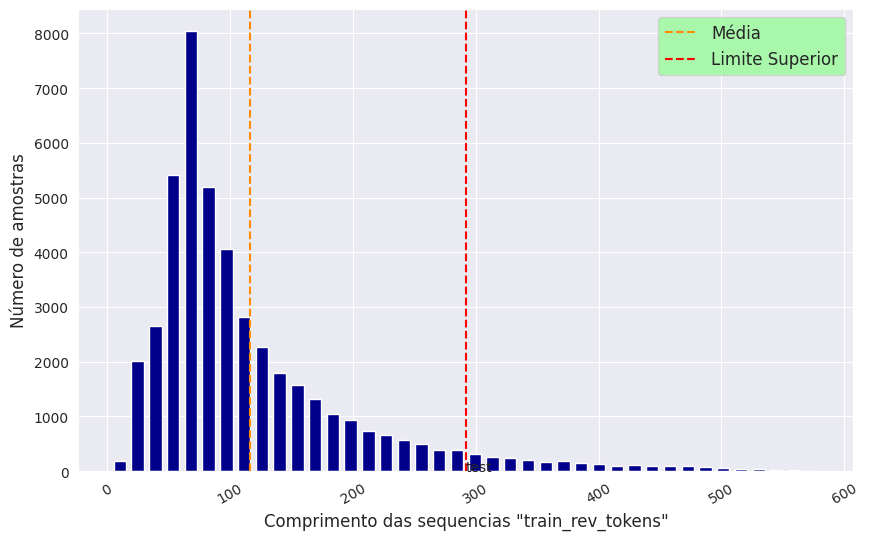

In [ ]:
# Armazenando em "upper_bound" nosso limite superior escolhido para o comprimento das sequências
# Calculando a porcentagem de comprimentos menores ou iguais a "upper_bound"
upper_bound = int(np.mean(seq_lengths) + 2 * np.std(seq_lengths))
percentage = stats.percentileofscore(seq_lengths, upper_bound)

print('O valor do limite superior é %d e o percentual de sequencias em "train_rev_tokens" \
de comprimento maior ou igual ao limite superior é %.2f%%.' % (upper_bound, round(percentage, 2)))

# Histograma dos comprimentos das sequências em "train_rev_tokens"
with sns.axes_style("darkgrid"):
    _, hist = plt.subplots(figsize=(10,6))
    hist.hist(seq_lengths[seq_lengths < 2*upper_bound], color='darkblue', bins=40, rwidth=0.7)
    hist.axvline(np.mean(seq_lengths), color='darkorange', linestyle='--', label='Média')
    hist.axvline(upper_bound, color='r', linestyle='--', label='Limite Superior')

    plt.xlabel('Comprimento das sequencias "train_rev_tokens"', size='large')
    plt.ylabel('Número de amostras', size='large')
    plt.text(upper_bound, 0, 'test')
    plt.legend(fontsize='large', facecolor='palegreen')
    plt.xticks(rotation=30)
    plt.show()

Usando a função pad_sequences() do módulo keras.preprocessing.sequence, transformamos "X_train_tokens" e "X_test_tokens" em arrays na forma (número de sequência, upper_bound).

Sequências de comprimento menor (resp. maior) que "upper_bound" são estendidas (resp. truncadas) para obter um comprimento igual a "upper_bound".


---

Precisamos agora garantir que todas as sequências da lista tenham o mesmo comprimento. Por padrão, isso é feito preenchendo 0 no início de cada sequência até que cada sequência tenha o mesmo comprimento que a sequência mais longa.

In [ ]:
from keras.utils import pad_sequences

X_train_pad = pad_sequences(X_train_tokens, maxlen=upper_bound)
X_test_pad = pad_sequences(X_test_tokens, maxlen=upper_bound)

print('\033[1m' + 'train_rev_pad.shape:' + '\033[0m', train_pad.shape)
print('\033[1m' + 'test_rev_pad.shape:' + '\033[0m', test_pad.shape, '\n')

# Printing an example of review after padding

idx_pad = random.randint(0, len(train_rev_pad)-1)
print('\033[1m' + 'Review #%d after padding:' %idx_pad + '\033[0m' + '\n', train_rev_pad[idx_pad])

train_rev_pad.shape: (45000, 292)
test_rev_pad.shape: (5000, 292) 

Review #26433 after padding:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

## B4. Modelo LSTM
Para processamento em cenários como este que estamos analisando, baseado em problemas de Processamento de Linguagem Natural, será utilizada a rede neural LSTM (Long Short Term Memory).

Começamos importando algumas classes do Keras:

- A classe Sequential da API keras.models (para agrupar uma pilha linear de camadas em um modelo)
- A classe Embedding da API keras.layers (para transformar inteiros positivos (índices) em vetores densos de tamanho fixo)
- A classe LSTM da API keras.layers (para aplicar uma camada de memória de longo prazo a uma entrada)
- A classe Dropout da API keras.layers (para aplicar dropout a uma entrada)
- A classe Dense da API keras.layers (para aplicar uma camada NN regular densamente conectada a uma entrada)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

## **Definição do arquitetura do modelo.**

Criando uma rede LSTM, usando a função de ativação linear retificada ou ReLU. e na camada de saida  a função sigmoide.

No modelo LSTM, definimos os seguintes parâmetros:

- A dimensão de saída da camada de Embedding (dimensão do espaço vetorial contendo a palavra embeddings) é "output_dim"
- O número de unidades da camada LSTM é "units_lstm"
- A taxa de abandono da camada de abandono é "r"
- A função de ativação da camada densa final é sigmóide, pois a saída do modelo deve ser um número entre 0, para avaliações negativas e 1, para avaliações positivas

In [ ]:
output_dim = 14
units_lstm = 16
r = 0.8

model = Sequential()
model.add(Embedding(input_dim=dict_size, output_dim=output_dim, input_length=upper_bound))
model.add(LSTM(units_lstm))
model.add(Dropout(r))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 292, 14)           490000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                1984      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 492,001
Trainable params: 492,001
Non-trainable params: 0
_________________________________________________________________


O modelo LSTM para treinamento será compilado com os seguintes parâmetros:

- "adam" - otimizador a ser utilizado durante o processo de treinamento;
- "binary cross-entropy" (bce) - função de custo para este classificador binário;
- "accuracy" - métrica a ser exibida durante o processo de treinamento (com que frequência os rótulos previstos são iguais aos verdadeiros)

In [ ]:
model.compile(optimizer='adam', loss='bce', metrics='accuracy')

We train the model with "train_rev_pad" as input array, "train_sent" as output array, validation split, batch size, number of epochs, and the option "shuffle=True" to shuffle the training data before each epoch. An epoch is a pass of the neural network over the entire training set and the batch size is the number of samples that are passed to the network at once. For each epoch, we thus have

In [ ]:
validation_split = 0.1
batch_size = 384
epochs = 3

fitted = model.fit(train_rev_pad, y_train, validation_split=validation_split,
                   batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/3


UnimplementedError: ignored



---


## Selecionando os dados

Como varia o valor de imdb_score

In [ ]:
imdbmax, imdbmin = dsmodel['imdb_score'].max(), dsmodel['imdb_score'].min()
print(f'os vaores de imdb_score variam entre {imdbmin} e {imdbmax}')

Criando uma classe para imdb_score

In [ ]:
import math
# criando um dicionario para convesão
imdb_class = {9: 'A', 8:'B', 7:'C', 6:'D', 5:'E', 4:'F', 3:'G', 2:'H', 1:'I'}
#salvando o dataframe
dsmodel1=dsmodel[:]
# criando nova variavel classe 'imdb_class'
dsmodel1['imdb_class'] = dsmodel1.apply(lambda row: imdb_class.get(math.floor(row.imdb_score)),
                                        axis=1)
# checando resultado
dsmodel1[['imdb_score','imdb_class']].head()

Preparando os dados

In [ ]:
# Separando atributos preditores e alvo
ncol_y=['imdb_class']
X1 = dsmodel1[ncol_X[:]]  # variaveis preditoras
y1 = dsmodel1[col_y[:]] # variavel alvo

# definindo parametros de teste/treino
test_size = 0.20 # tamanho do conjunto de testes.
seed = 7 # semente geradora dos numeros aleatórios

# definindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=test_size, shuffle=True, random_state=seed)

## **Definição do arquitetura do modelo.**

Criando a Rede Neural, usando a função de ativação linear retificada ou ReLU. e na camada de saida  a função sigmoide

In [ ]:
from keras.utils import to_categorical
from keras import models
from keras import layers

In [ ]:
model=models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)